# Problem set 3
## Question 1

##### Step 1. Import the necessary libraries

##### Step 2. Import the dataset from this address.

##### Step 3. Assign it to a variable called users

In [3]:
# Steps 1 to 3
import pandas as pd
import numpy as np

#load the data from a website and name it to users
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


##### Step 4. Discover what is the mean age per occupation

In [6]:
users.groupby('occupation').age.agg(['mean'])

,mean
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


##### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [10]:
users['isMale']= np.where(users.gender == 'M', 1, 0)
(users.groupby('occupation').isMale.sum()/users.groupby('occupation').gender.count()).sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

##### Step 6. For each occupation, calculate the minimum and maximum ages


In [12]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


##### Step 7. For each combination of occupation and sex, calculate the mean age


In [14]:
users.groupby(['occupation','gender']).age.agg(['mean'])

mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

##### Step 8. For each occupation present the percentage of women and men

In [30]:
# create a pivot table indexed by occupation and using gender as columns.
occPercentage = users.pivot_table(index='occupation', columns='gender',  aggfunc='size', fill_value=0)

# take the pivot table with its columns F and M and will sum based on axis 1 (column)
totalPop = occPercentage[['F', 'M']].sum(axis=1)

#column to store the % by taking the values of M and dividing it by the total
occPercentage['% of Male'] = (100 * occPercentage['M'])/totalPop
occPercentage['% of Male'] = occPercentage['% of Male'].round(decimals=1)     ##round decimals to 1

#column to store the % by taking the values of F and dividing it by total
occPercentage['% of Female'] = (100 * occPercentage['F'])/totalPop
occPercentage['% of Female'] = occPercentage['% of Female'].round(decimals=1)  #round decimals to 1

#drop extra columns F and M
occPercentage.drop(columns =['F'], inplace = True)
occPercentage.drop(columns =['M'], inplace = True)
occPercentage

gender,% of Male,% of Female
occupation,,
administrator,54.4,45.6
artist,53.6,46.4
doctor,100.0,0.0
educator,72.6,27.4
engineer,97.0,3.0
entertainment,88.9,11.1
executive,90.6,9.4
healthcare,31.2,68.8
homemaker,14.3,85.7


## Question 2

##### Step 1. Import the necessary libraries
##### Step 2. Import the dataset from this address
##### Step 3. Assign it to a variable called euro12

In [31]:
import pandas as pd
import numpy as np

euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


##### Step 4. Select only the Goal column

In [33]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

##### Step 5. How many team participated in the Euro2012?

In [34]:
euro12['Team'].count()

16

##### Step 6. What is the number of columns in the dataset?

In [35]:
len(euro12.columns)

35

##### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [37]:
discipline=euro12[['Team','Yellow Cards','Red Cards']]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


##### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [38]:
discipline.sort_values(by = ['Red Cards','Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


##### Step 9. Calculate the mean Yellow Cards given per Team

In [40]:
(discipline.groupby('Team').agg(['mean']))['Yellow Cards']

,mean
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


##### Step 10. Filter teams that scored more than 6 goals

In [41]:
euro12[euro12['Goals'] > 6][['Team','Goals']]

,Team,Goals
5,Germany,10
13,Spain,12


##### Step 11. Select the teams that start with G

In [42]:
euro12[euro12['Team'].str.startswith('G')][['Team']]

,Team
5,Germany
6,Greece


##### Step 12. Select the first 7 columns

In [43]:
euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


##### Step 13. Select all columns except the last 3

In [45]:
euro12[euro12.columns[0:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


##### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [50]:
euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3

##### Step 1. Step 1. Import the necessary libraries
##### Step 2. Create 3 differents Series, each of length 100, as follows:
##### The first a random number from 1 to 4
##### The second a random number from 1 to 3
##### The third a random number from 10,000 to 30,000

In [52]:
import pandas as pd
import random
#create the 3 Panda Series from random integers within the min and max requested and with a size of 100 values
series1 = pd.Series(np.random.randint(1,5, size=100), name = 'series1')
series2 = pd.Series(np.random.randint(1,4, size=100), name = 'series2')
series3 = pd.Series(np.random.randint(10000,30001, size=100), name = 'series3')

##### Step 3. Create a DataFrame by joinning the Series by column

In [56]:
DataFrame = pd.concat([series1, series2, series3], axis = 1)
DataFrame

,series1,series2,series3
0,4,1,18012
1,3,1,21516
2,2,1,13089
3,3,1,26261
4,3,2,13186
...,...,...,...
95,2,3,29352
96,4,1,14458
97,1,2,19476
98,1,1,29406


###### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [59]:
DataFrame.columns=['bedrs','bathrs','price_sqr_meter']
DataFrame.head()

,bedrs,bathrs,price_sqr_meter
0,4,1,18012
1,3,1,21516
2,2,1,13089
3,3,1,26261
4,3,2,13186


##### Step 5. Create a one column DataFrame with the values of the 3 Series and assign itto 'bigcolumn'

In [63]:
bigcolumn = pd.DataFrame(columns = ['bigcolumn'])
bigcolumn['bigcolumn'] = DataFrame[DataFrame.columns[0:]].apply(lambda x: ', '.join(x.astype(str)),axis=1)
                        
bigcolumn

,bigcolumn
0,"4, 1, 18012"
1,"3, 1, 21516"
2,"2, 1, 13089"
3,"3, 1, 26261"
4,"3, 2, 13186"
...,...
95,"2, 3, 29352"
96,"4, 1, 14458"
97,"1, 2, 19476"
98,"1, 1, 29406"


In [66]:
bigcolumn=pd.concat([series1, series2, series3])
bigcolumn.columns=['bigcolumn']
bigcolumn

0         4
1         3
2         2
3         3
4         3
      ...  
95    29352
96    14458
97    19476
98    29406
99    11876
Length: 300, dtype: int32

##### Step 6. Ops it seems it is going only until index 99. Is it true?

In [ ]:
yes, the index starts from 0 and goes till 99

###### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [67]:
bigcolumn.reset_index()

,index,0
0,0,4
1,1,3
2,2,2
3,3,3
4,4,3
...,...,...
295,95,29352
296,96,14458
297,97,19476
298,98,29406


# Question 4
##### Step 1. Import the necessary libraries
##### Step 2. Import the dataset from the attached file wind.txt

In [3]:
import pandas as pd
import numpy as np
import datetime


In [5]:
windData=pd.read_csv('C:\\Users\\gdeep\\Documents\\BDAT\\wind.txt',sep = '\s+')
windData.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


##### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [6]:
windData['Date']=pd.to_datetime(windData[["Mo","Dy","Yr"]].astype(str).agg('-'.join, axis=1))
windData=windData.drop(columns=["Mo","Dy","Yr"])
windData.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


##### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [8]:
windData.dtypes
def Year_Correction(x):
    if x.year > 2021:
        year = x.year - 100 #if year greater than 2021- subtract 100
    else:
        year = x.year
    return datetime.date(year, x.month, x.day)
windData.Date = windData.Date.apply(Year_Correction)
windData

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


##### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [10]:
windData['Date']=pd.to_datetime(windData['Date'])
windData=windData.set_index('Date')
windData.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


##### Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [11]:
windData.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

##### Step 7. Compute how many non-missing values there are in total.

In [13]:
windData.notnull().sum().sum()

78857

##### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.

In [14]:
windData.mean().mean()

10.227982360836924

##### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.

In [15]:
loc_stats = windData.describe()
loc_stats.loc[['mean','std','min','max'],:]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


##### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.

In [20]:
day_stats = windData.apply(pd.DataFrame.describe,axis=1)

In [22]:
day_stats[['min','max','mean','std']]

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


##### Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.

In [23]:
windData[windData.index.month==1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

##### Step 12. Downsample the record to a yearly frequency for each location.

In [26]:
YearlyData=windData.resample('Y').count()
YearlyData.index=YearlyData.index.to_period('Y')
YearlyData

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,360,362,363,361,363,365,362,363,362,364,365,362
1962,364,365,365,364,365,365,365,365,365,365,365,364
1963,365,365,365,365,365,365,365,365,365,365,365,365
1964,366,366,366,366,366,366,366,366,366,366,366,366
1965,365,365,365,365,365,365,365,365,365,365,365,365
1966,365,365,365,365,365,365,365,365,365,365,365,365
1967,365,365,365,365,365,365,365,365,365,365,365,365
1968,366,366,366,366,366,366,366,366,366,366,366,366
1969,365,365,365,365,365,365,365,365,365,365,365,365


##### Step 13. Downsample the record to a monthly frequency for each location.

In [27]:
MonthlyData=windData.resample('M').count()
MonthlyData.index=MonthlyData.index.to_period('M')
MonthlyData

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01,30,30,31,31,29,31,31,30,31,31,31,31
1961-02,28,28,27,27,28,28,28,28,28,28,28,28
1961-03,30,31,31,30,31,31,31,31,29,31,31,30
1961-04,30,30,30,30,30,30,30,30,30,30,30,30
1961-05,31,30,31,30,31,31,30,31,31,31,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,31,31,31,31,31,31,31,31,31,31,31,31
1978-09,30,30,30,30,30,30,30,30,30,30,30,30
1978-10,31,31,31,31,31,31,31,31,31,31,31,31


##### Step 14. Downsample the record to a weekly frequency for each location.

In [29]:
WeeklyData=windData.resample('7D').count()
WeeklyData.index=WeeklyData.index.to_period('7D')
WeeklyData

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,7,6,7,7,6,7,7,6,7,7,7,7
1961-01-08,7,7,7,7,7,7,7,7,7,7,7,7
1961-01-15,7,7,7,7,6,7,7,7,7,7,7,7
1961-01-22,7,7,7,7,7,7,7,7,7,7,7,7
1961-01-29,6,7,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,7,7,7,7,7,7,7,7,7,7,7,7
1978-12-10,7,7,7,7,7,7,7,7,7,7,7,7
1978-12-17,7,7,7,7,7,7,7,7,7,7,7,7


##### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [31]:
WeekData=windData.groupby(windData.index.to_period('W')).mean().apply(pd.DataFrame.describe, axis=1,)
WeekData.iloc[ 1: , :]

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
1961-01-02/1961-01-08,12.0,9.847659,2.601705,6.417143,7.979881,9.980714,11.735357,13.541429
1961-01-09/1961-01-15,12.0,8.353214,2.719649,4.630000,6.543214,7.553571,11.049643,12.468571
1961-01-16/1961-01-22,12.0,9.368413,2.224531,6.328571,7.761071,9.111905,10.255714,13.204286
1961-01-23/1961-01-29,12.0,16.958095,2.915635,12.720000,15.077143,15.890714,18.639286,22.530000
1961-01-30/1961-02-05,12.0,11.800357,2.807310,8.247143,9.371786,12.070000,13.524286,16.827143
...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,12.0,10.913333,3.557747,5.565714,8.913214,9.929286,12.362143,18.728571
1978-12-04/1978-12-10,12.0,15.938333,3.843412,9.777143,13.596071,14.862143,18.685357,23.061429
1978-12-11/1978-12-17,12.0,11.216786,3.474393,6.917143,8.416071,10.655714,14.766429,16.758571


## Question 5
##### Step 1. Import the necessary libraries
##### Step 2. Import the dataset from this address.
##### Step 3. Assign it to a variable called chipo.

In [35]:
chipotle = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


##### Step 4. See the first 10 entries

In [36]:
chipotle.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


##### Step 5. What is the number of observations in the dataset?

In [37]:
len(chipotle)

4622

##### Step 6. What is the number of columns in the dataset?

In [38]:
len(chipotle.columns)

5

##### Step 7. Print the name of all the columns.

In [40]:
chipotle.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

##### Step 8. How is the dataset indexed?

In [41]:
chipotle.index

RangeIndex(start=0, stop=4622, step=1)

##### Step 9. Which was the most-ordered item?

In [42]:
chipotle_Gruoped=chipotle.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
chipotle_Gruoped.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


##### Step 10. For the most-ordered item, how many items were ordered?

In [43]:
chipotle_Gruoped.head(1).quantity

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

##### Step 11. What was the most ordered item in the choice_description column?

In [44]:
chipotle.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


##### Step 12. How many items were orderd in total?

In [45]:
chipotle['quantity'].sum()

4972

##### Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [47]:
chipotle['item_price']=chipotle['item_price'].apply(lambda x: float(x))
chipotle['item_price'].dtypes

dtype('float64')

##### Step 14. How much was the revenue for the period in the dataset?

In [48]:
chipotle['quantity']=chipotle['quantity'].astype(float)
chipotle['Revenue']=chipotle['item_price']*chipo['quantity']
chipotle['Revenue'].sum()

39237.02

##### Step 15. How many orders were made in the period?

In [49]:
chipotle['order_id'].value_counts().count()

1834

##### Step 16. What is the average revenue amount per order?

In [50]:
chipotle.groupby('order_id').Revenue.agg('mean')

order_id
1        2.890000
2       33.960000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: Revenue, Length: 1834, dtype: float64

##### Step 17. How many different items are sold?

In [51]:
chipotle['item_name'].value_counts().count()

50

## Question 6
##### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014.
Label both lines and show the legend. Don't forget to label your axes!

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:\\Users\\gdeep\\Documents\\BDAT\\us-marriages-divorces-1867-2014.csv')
data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


<Figure size 1296x720 with 0 Axes>

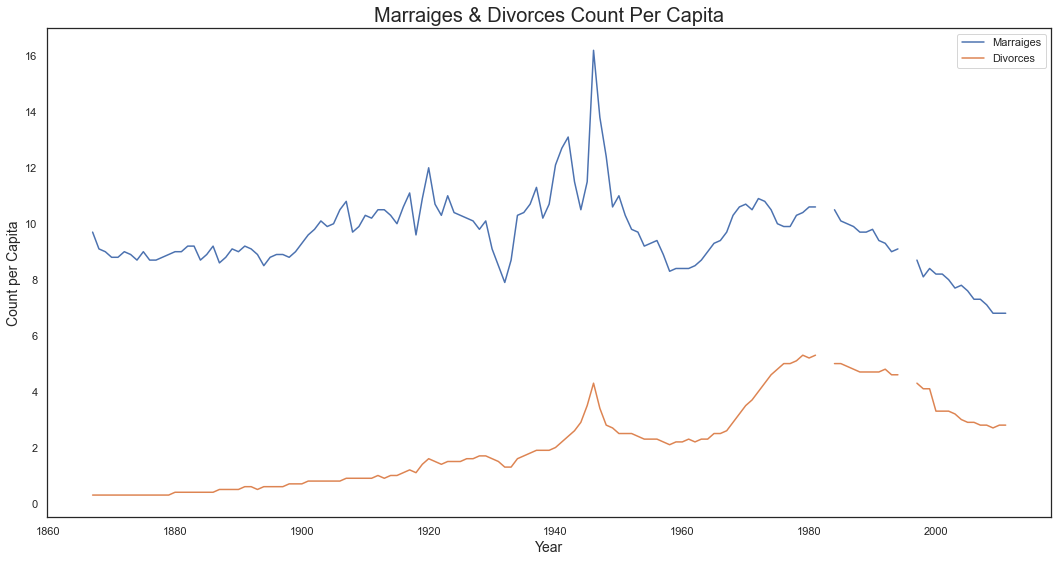

In [33]:
plt.figure( figsize=(18, 10))
data.plot(x = 'Year', y = ['Marriages_per_1000','Divorces_per_1000'],
label = ['Marraiges' , 'Divorces'])
plt.title('Marraiges & Divorces Count Per Capita', fontsize = 20)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Count per Capita', fontsize = 14)
plt.show()

## Question 7
##### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [34]:
Data_BarChart=data[data['Year'].isin([1900,1950,2000])][['Year','Marriages_per_1000','Divorces_per_1000']]

([<matplotlib.axis.XTick at 0x25704337c10>,
 [Text(0, 0, '1900'), Text(1, 0, '1950'), Text(2, 0, '2000')])

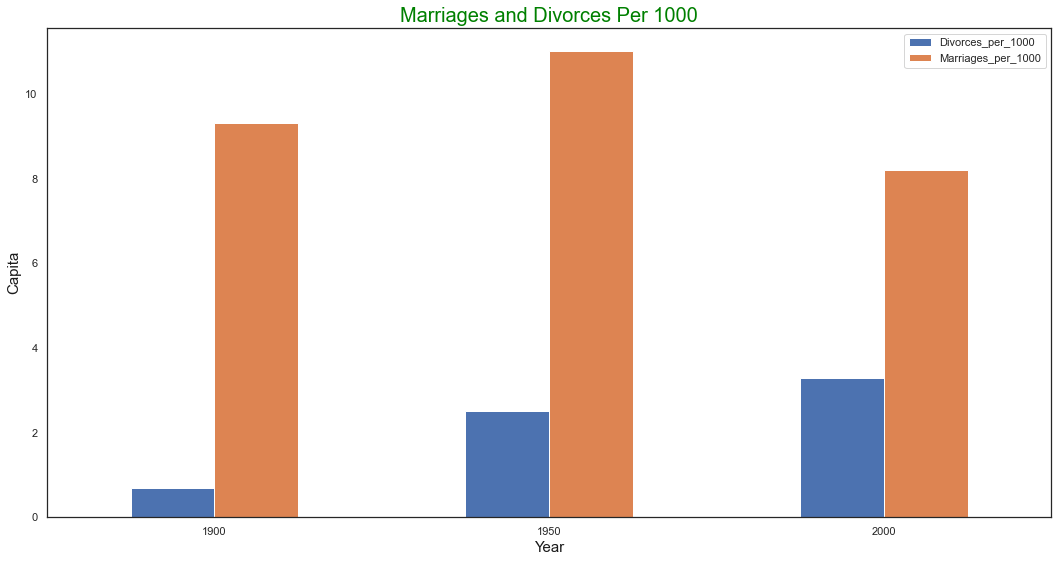

In [35]:
Data_BarChart[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()
plt.title("Marriages and Divorces Per 1000", color = 'Green', fontsize = 20)
plt.xlabel('Year', color = 'k', fontsize = 15)
plt.ylabel('Capita', color = 'k', fontsize = 15)
positions = (0,1,2)
labels = ("1900", "1950", "2000")
plt.xticks(positions, labels, rotation = 0)


## Question 8
##### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [36]:
dataActor = pd.read_csv('C:\\Users\\gdeep\\Documents\\BDAT\\actor_kill_counts.csv')
sortData=dataset.sort_values('Count', ascending = True)

Text(0, 0.5, 'Actor')

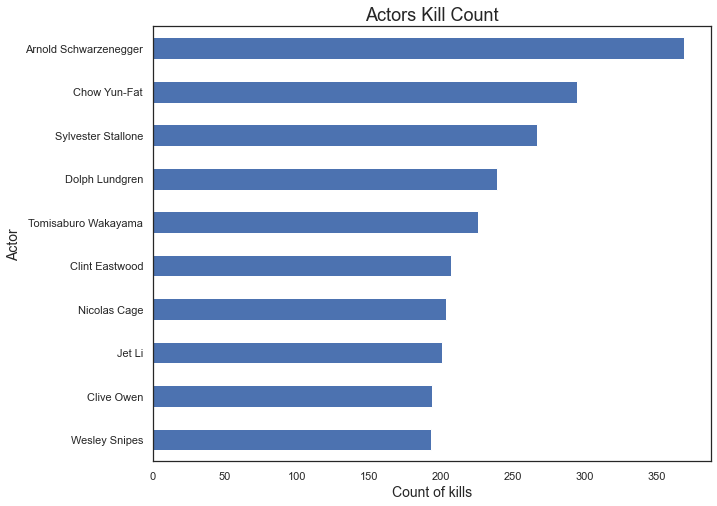

In [37]:
sortData.plot.barh(x='Actor', y='Count',legend=False,figsize=(10,8))
plt.title('Actors Kill Count', fontsize=18)
plt.xlabel('Count of kills', fontsize = 14)
plt.ylabel('Actor', fontsize = 14)

## Question 9
##### Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

In [19]:
dataRoman = pd.read_csv('C:\\Users\\gdeep\\Documents\\BDAT\\roman-emperor-reigns.csv')
dataRoman

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


Text(0.5, 1.0, "Roman Emperor's Cause of Death")

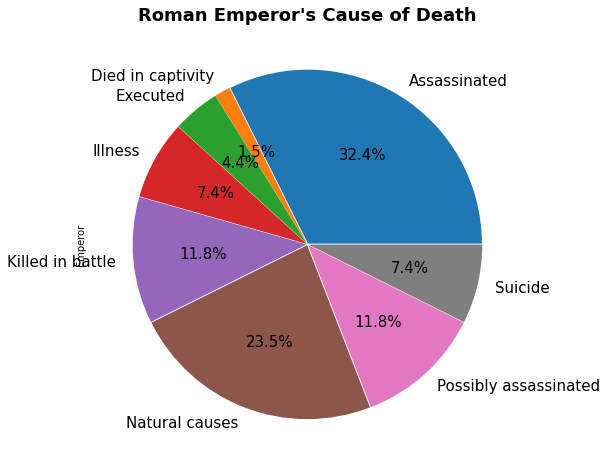

In [20]:
dataRomanFiltered=dataRoman.groupby("Cause_of_Death")['Emperor'].count()
dataRomanFiltered.plot.pie(autopct="%.1f%%", figsize = (8,8) , fontsize = 15, explode=[0.005]*8)
plt.title("Roman Emperor's Cause of Death", fontsize = 18, fontweight ='bold')

## Question 10
##### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

In [27]:
dataRevenueUS = pd.read_csv('C:\\Users\\gdeep\\Documents\\BDAT\\arcade-revenue-vs-cs-doctorates.csv')

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

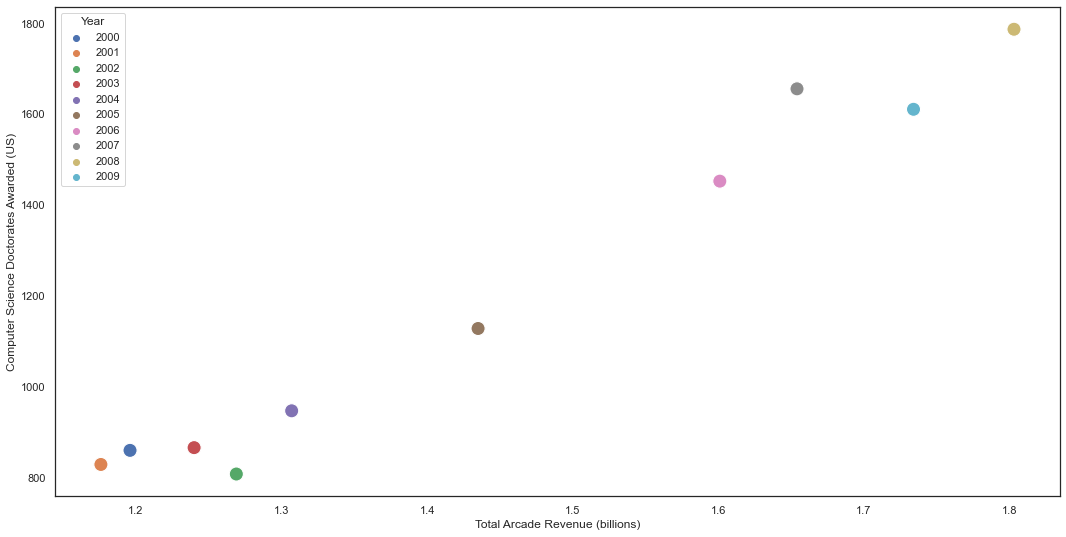

In [29]:
sns.set(rc = {'figure.figsize':(18,9)})
sns.set_theme(style="white")
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', 
                hue='Year', data=dataRevenueUS, palette="deep",s=200)